<a href="https://colab.research.google.com/github/ibryegen/Deep_Learning/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers

In [2]:
encoding_dims = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dims, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [6]:
encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dims,))


decoder_layer = autoencoder.layers[-1]


decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
from keras.datasets import mnist
import numpy as np

In [9]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


In [11]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2758 - val_loss: 0.1897
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1715 - val_loss: 0.1543
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1453 - val_loss: 0.1347
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1291 - val_loss: 0.1215
Epoch 5/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1179 - val_loss: 0.1122
Epoch 6/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1101 - val_loss: 0.1057
Epoch 7/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1046 - val_loss: 0.1011
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1009 - val_loss: 0.0981
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0984 - val_loss: 0.0962
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0969 - val_los

In [13]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


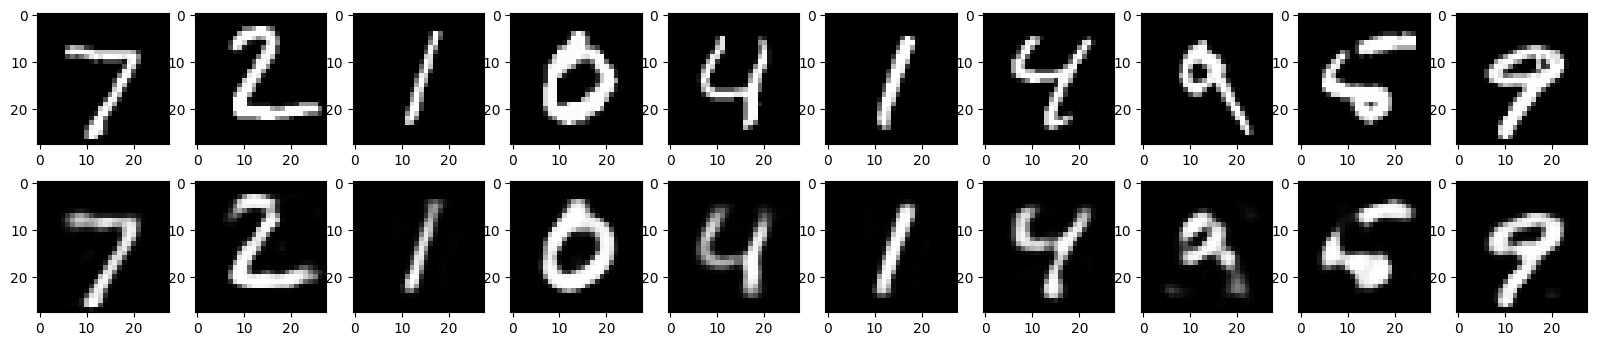

In [14]:
from matplotlib import pyplot as plt

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
plt.show()